In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('mobile_price_prediction.csv')
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [37]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [38]:
df.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [39]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [40]:
df.dtypes

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

<Axes: ylabel='thickness'>

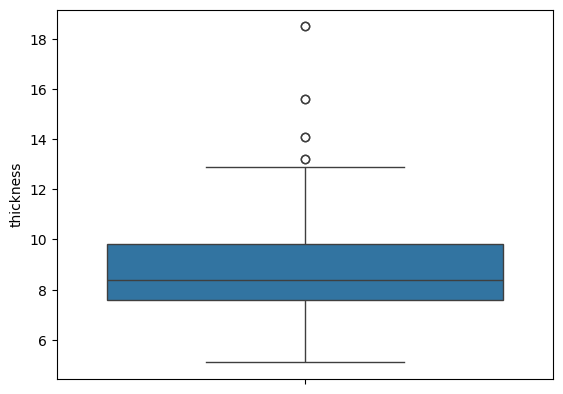

In [41]:
sns.boxplot(df['thickness'])

<Axes: >

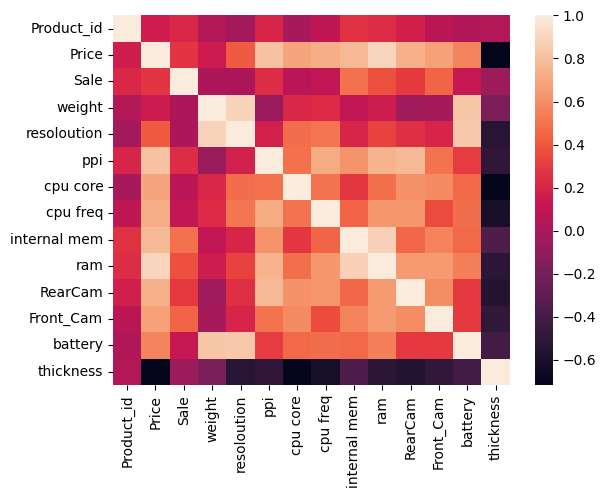

In [42]:
sns.heatmap(df.corr(numeric_only = True))

<Axes: xlabel='thickness', ylabel='Count'>

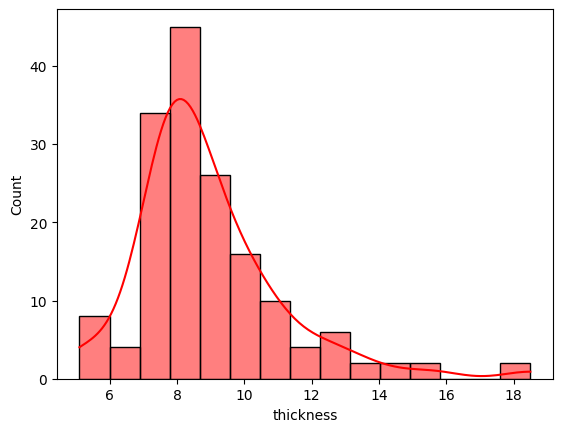

In [43]:
sns.histplot(df['thickness'],kde =True,bins = 15, color = 'red')

Here kde represents kernel density estimate which is shown through a curve here.

In [44]:
Q3 = np.percentile(df['thickness'],75,method = 'midpoint')
Q1 = np.percentile(df['thickness'],25,method = 'midpoint')
IQR = Q3 - Q1
print(IQR)
upper = Q3 + 1.5*IQR
upper_array = np.array(df['thickness']>= upper)
print("Upper Bound is :",upper)
print(upper_array)
print(upper_array.sum())

2.200000000000001
Upper Bound is : 13.100000000000001
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False False False False
 False False False False False False False False  True  True False False
 False False False False False  True  True False False False False Fal

In [45]:
lower = Q1 - 1.5*IQR
lower_array = np.array(df['thickness']<=lower)
print("Lower Bound is :",lower)
print(lower_array)
print(lower_array.sum())

Lower Bound is : 4.299999999999998
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

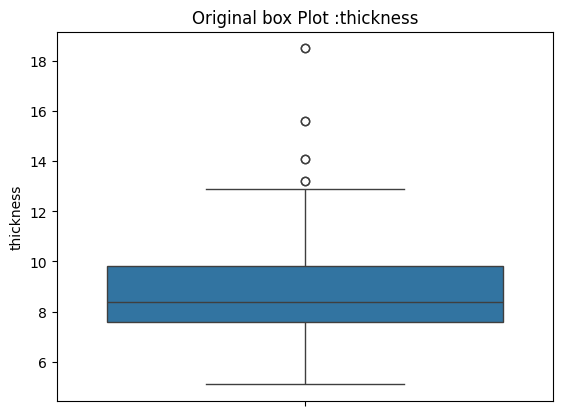

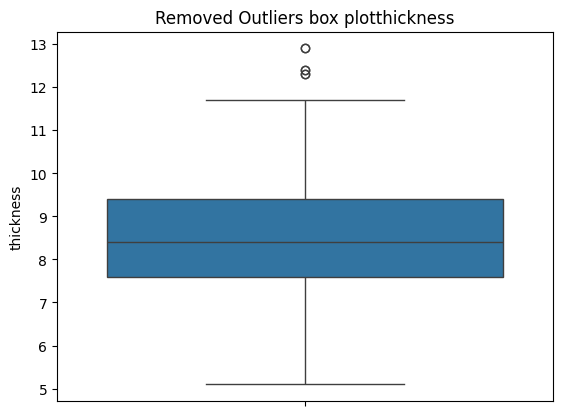

In [46]:
def box_plot_removal(df,column,threshold):
    sns.boxplot(df[column])
    plt.title(f'Original box Plot :{column}')
    plt.show()
    removed_outliers = df[df[column]<=threshold]
    sns.boxplot(removed_outliers[column])
    plt.title(f'Removed Outliers box plot{column}')
    plt.show()
    return removed_outliers
th = 13
no_outliers = box_plot_removal(df,'thickness',th)


In [47]:
no_outliers

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


<Axes: xlabel='thickness', ylabel='Count'>

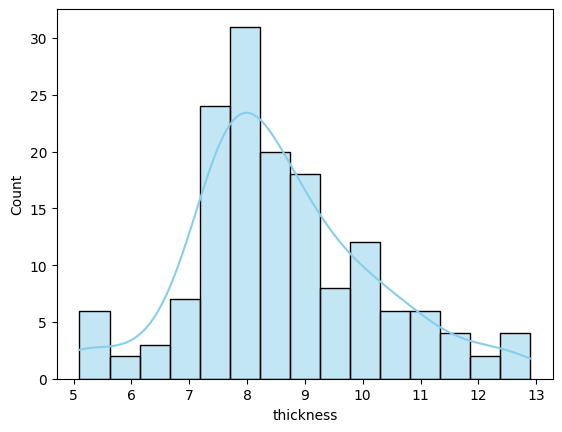

In [48]:
sns.histplot(no_outliers['thickness'],kde =True,bins = 15, color = 'skyblue')

In [49]:
print(f"Mean : {df['thickness'].mean()}")
print(f"Median : {df['thickness'].median()}")

Mean : 8.921739130434782
Median : 8.4


Here mean > median indicates the data is positively skewed.

In [50]:
print(f"Mean : {no_outliers['thickness'].mean()}")
print(f"Median : {no_outliers['thickness'].median()}")

Mean : 8.58562091503268
Median : 8.4


In [51]:
Q1_1 = df['thickness'].quantile(0.25)
Q3_1 = df['thickness'].quantile(0.75)
print(Q1)
print(Q1_1)
print(Q3)
print(Q3_1)


7.6
7.6
9.8
9.8


<Axes: xlabel='thickness', ylabel='Count'>

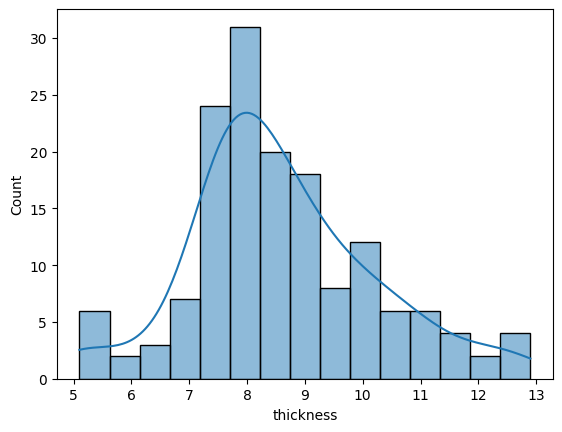

In [52]:
df_no_outliers = df[(df['thickness']>= lower) & (df['thickness']<= upper)]
sns.histplot(df_no_outliers['thickness'],kde= True,bins = 15)

<Axes: >

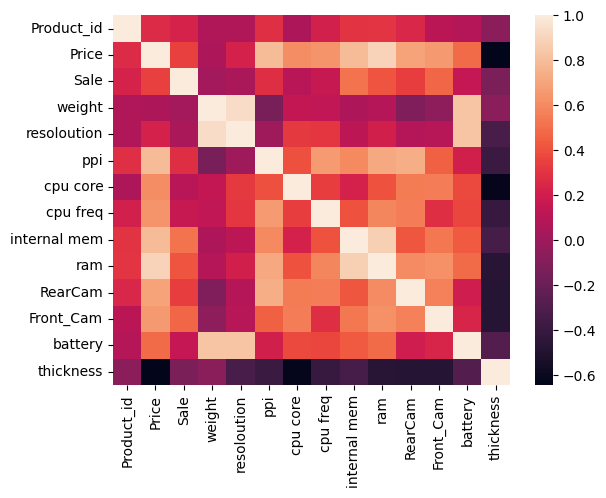

In [53]:
sns.heatmap(df_no_outliers.corr(numeric_only = True))

<Axes: >

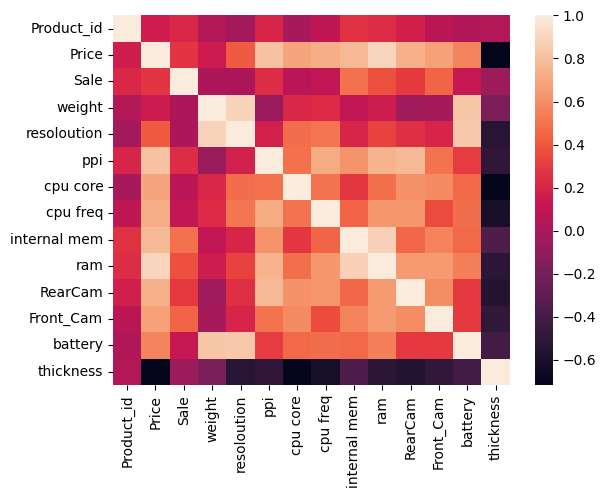

In [54]:
sns.heatmap(df.corr(numeric_only=True))

In [55]:
cor_matirx = df.corr(numeric_only=True)
target_corr = cor_matirx['Price'].sort_values(ascending = False)
print(target_corr)

Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
Product_id      0.165136
weight          0.144555
thickness      -0.716773
Name: Price, dtype: float64


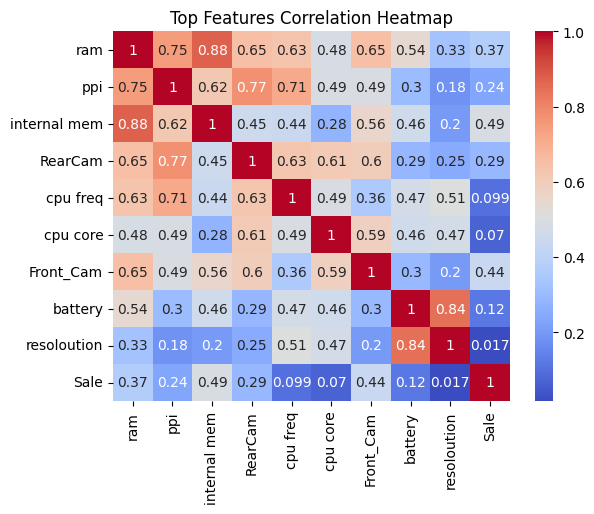

In [56]:
top_features = target_corr[1:11].index
sns.heatmap(df[top_features].corr(),annot = True,cmap = 'coolwarm')
plt.title("Top Features Correlation Heatmap")
plt.show()

In [57]:
df_no_outliers.drop('Product_id',axis = 1,inplace = True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_8128\2278544473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop('Product_id',axis = 1,inplace = True)


In [58]:
df_no_outliers

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [59]:
x = df_no_outliers.iloc[:,1:]
y = df_no_outliers['Price']
y


0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 153, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)
y_train

110     754
92     1831
106    2744
16     2258
113     754
       ... 
71     2276
108    1676
14     2580
94     1511
104    2744
Name: Price, Length: 107, dtype: int64

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,root_mean_squared_error
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f"r2_score is {r2_score(y_test,y_pred)}")
print(f"mape is : {mean_absolute_percentage_error(y_test,y_pred)}")
print(f"mean abs error is :{mean_absolute_error(y_test,y_pred)}")
print(f"Root mean squared error is :{root_mean_squared_error(y_test,y_pred)}")


r2_score is 0.9214940610510307
mape is : 0.061943893117078555
mean abs error is :136.53426044290774
Root mean squared error is :164.62980607869596


In [63]:
df3 = pd.DataFrame({"Actual Value":y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
df3

,Actual Value,Predicted Value,Difference
85,1396,1492.038275,-96.038275
88,1302,1466.378246,-164.378246
99,1511,1621.863659,-110.863659
117,3287,3080.019757,206.980243
29,1950,1846.959414,103.040586
116,3287,3080.461473,206.538527
78,2714,2587.763872,126.236128
82,3005,2916.393307,88.606693
18,1612,1695.494171,-83.494171
15,1612,1695.532581,-83.532581
